In [2]:
import pandas as pd
import random
import itertools
import numpy as np
import time 
import pickle
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact, ranksums
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Context and Background

Generating heat maps of genes in cells in addition to just tumor cells


Background: So one thing that could be possible that some of these neurotransmitter genes are actually expressed in other cell types, and they might actually be important to tumor development in that regard. So one thing that would be really nice to look at is what is the expression of these genes in other cell types. I am attaching a list of genes that would be good to develop a heat map by cell type.

Example that is somewhat similar to what I am envisioning: on the y axis, you see the names of the cell types (which you can also find in our database as well, but you will have to use the complete file as opposed to just the isolated tumor cells); then on the x axis, you would plot the genes that I've provided in the spreadsheet.

Can we plot the heat map two different ways?
1. Plotting the mean of the expression values for each gene for each cell type
2. Plotting the mean of non-zero expression values for each gene for each cell type; so in this case, you would actually exclude the zero values from your calculation of the mean.

In [3]:
column_names = pd.read_csv('data/columns for X.csv',header = None)
column_names = list(column_names[0])

rows = pd.read_csv('data/rows for X.csv',header = None)
cell_type = list(rows[0])
cell_type = [val.lower() for val in cell_type]

gene_list_hm = pd.read_csv('data/102820_for Peter_genes for multiple cell types.csv', header = None)
gene_list_hm = list(gene_list_hm[0])

In [7]:
df_hm = pd.read_csv('data/X.csv',names = column_names, usecols = gene_list_hm)
df_hm['cell_type'] = cell_type

### mean heatmap

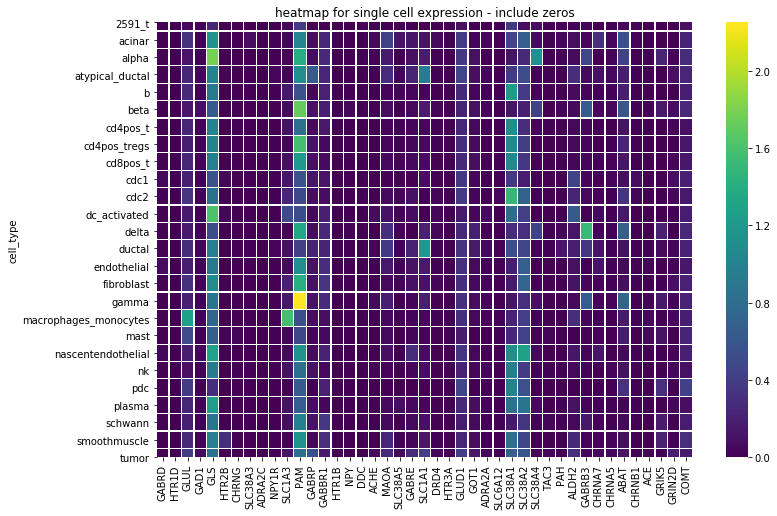

In [8]:
df_hm_mean = df_hm.groupby('cell_type').mean()

plt.figure(figsize = (12,8))
sns.heatmap(df_hm_mean,linewidth = .2, cmap="viridis")
plt.title('heatmap for single cell expression - include zeros')
plt.savefig('single_cell_heatmaps/22_gene_heatmap_with_zeros.png')

## mean - nonzero heatmap

/Users/PeterC/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:1062: RuntimeWarning: Mean of empty slice
  f = lambda x: func(x, *args, **kwargs)


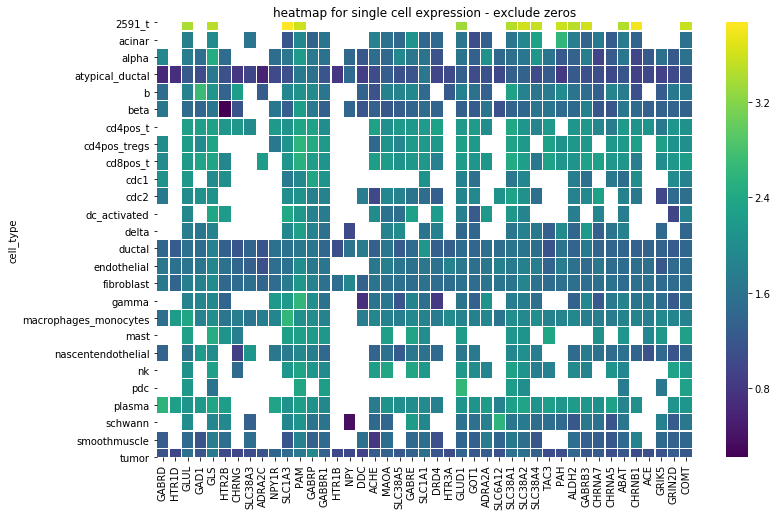

In [9]:
df_hm_nonzero = df_hm.replace(0,np.nan)

df_hm_mean_nonzero = df_hm_nonzero.groupby('cell_type').agg(np.nanmean)

plt.figure(figsize = (12,8))
sns.heatmap(df_hm_mean_nonzero,linewidth = .2,cmap="viridis")

plt.title('heatmap for single cell expression - exclude zeros')
plt.savefig('single_cell_heatmaps/22_gene_heatmap_nonzeros.png')

In [5]:
df_neuro_groups = pd.read_csv('data/neurotransmitter_groups.csv')
df_neuro_groups.head()

,Neurotransmitter Ligand,Genes
0,Adrenergics (includes Norepinephrine & Epineph...,ADRA1A
1,Adrenergics (includes Norepinephrine & Epineph...,ADRA1B
2,Adrenergics (includes Norepinephrine & Epineph...,ADRA1D
3,Adrenergics (includes Norepinephrine & Epineph...,ADRA2A
4,Adrenergics (includes Norepinephrine & Epineph...,ADRA2B


In [12]:
df_test = pd.read_csv('data/X.csv', nrows = 1)

In [20]:
cols_to_keep = [col for col in list(df_neuro_groups['Genes']) if col not in ['PPYR1', 'HTR5BP']]

In [21]:
df_hm_2 = pd.read_csv('data/X.csv',
                      names = column_names, 
                      usecols = cols_to_keep)
                      
df_hm_2['cell_type'] = cell_type

In [23]:
df_hm_2.head()

,GABRD,HTR6,HTR1D,GRIK3,CHRNB2,GLUL,CHRM3,TACR1,ADRA2B,SLC5A7,...,HRH3,CHRNA4,GRIN3B,SLC1A6,GRIK5,GRIN2D,SLC17A7,COMT,GRIK1,cell_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tumor
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tumor
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fibroblast
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tumor
4,0.0,0.0,0.0,0.0,0.0,0.0,2.431281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,endothelial


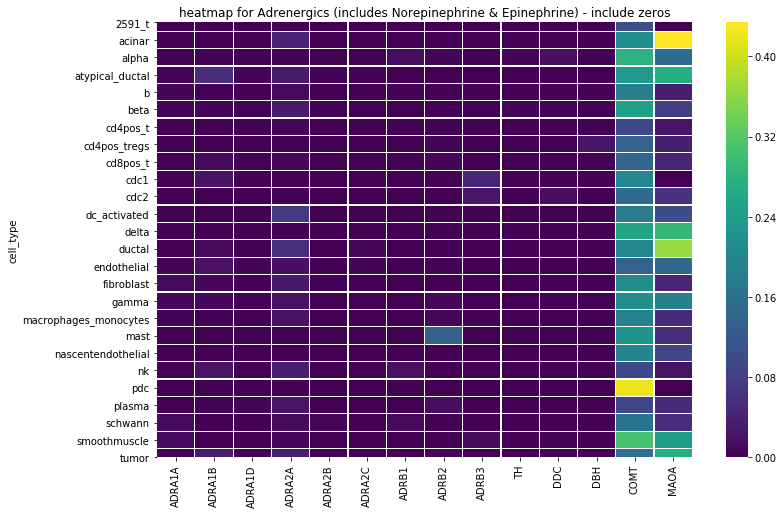

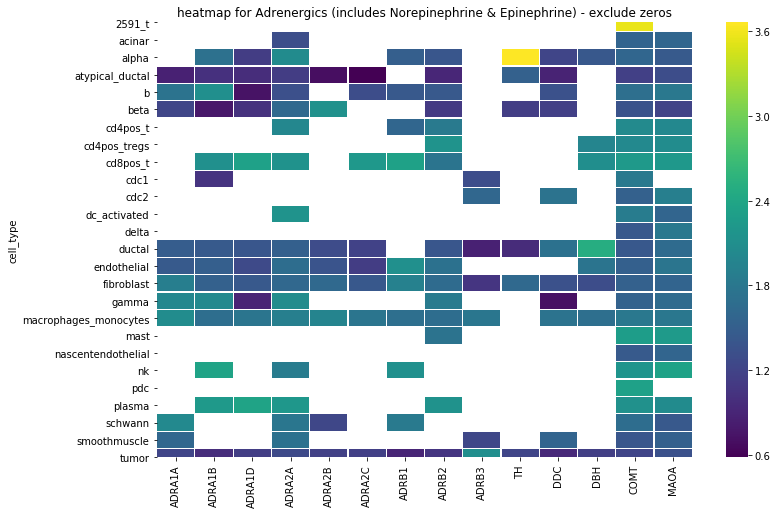

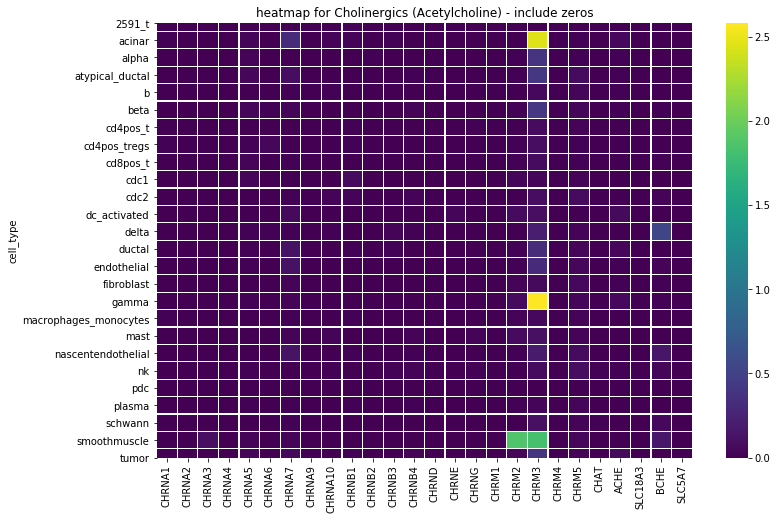

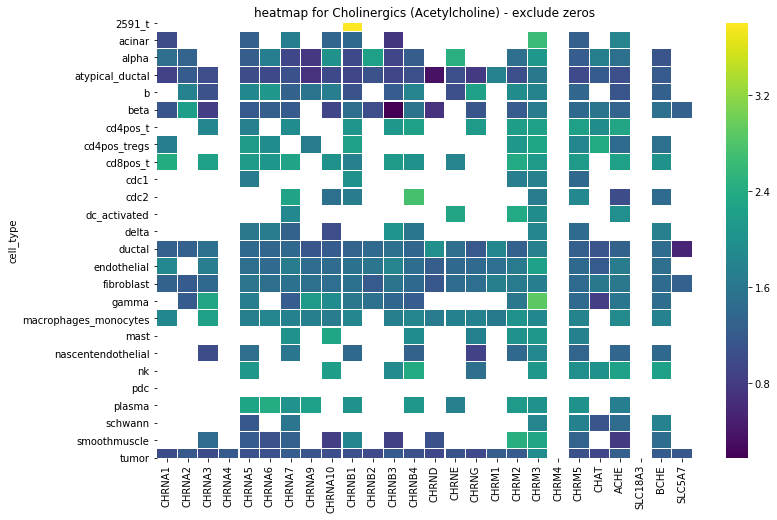

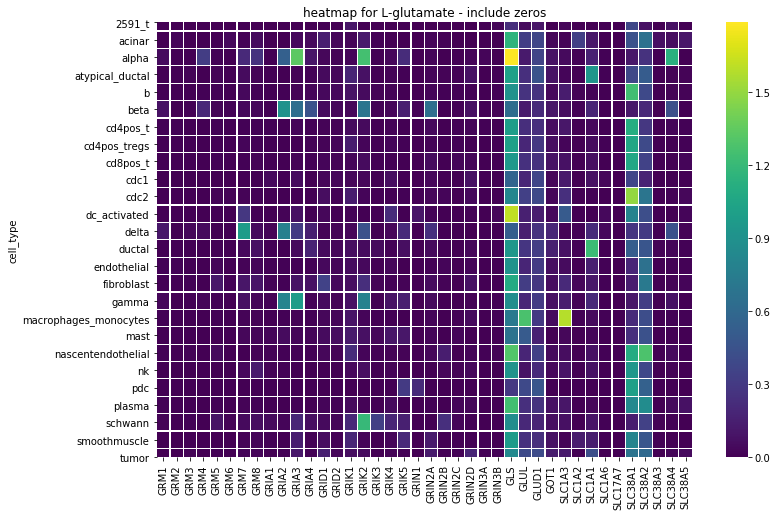

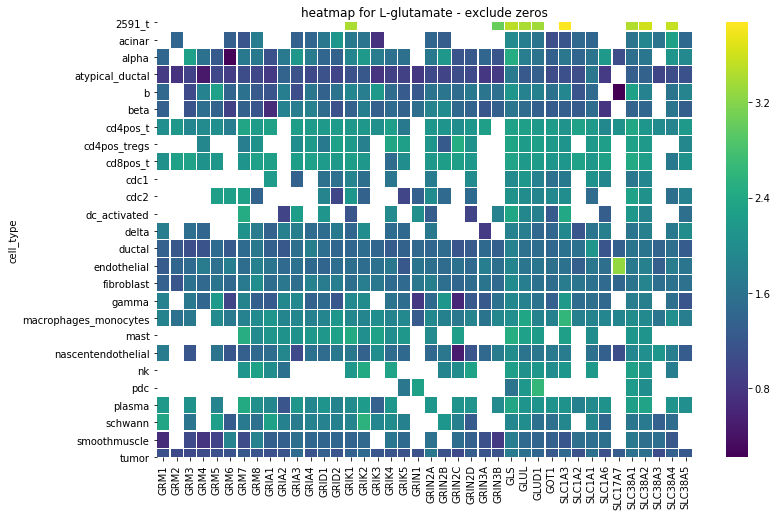

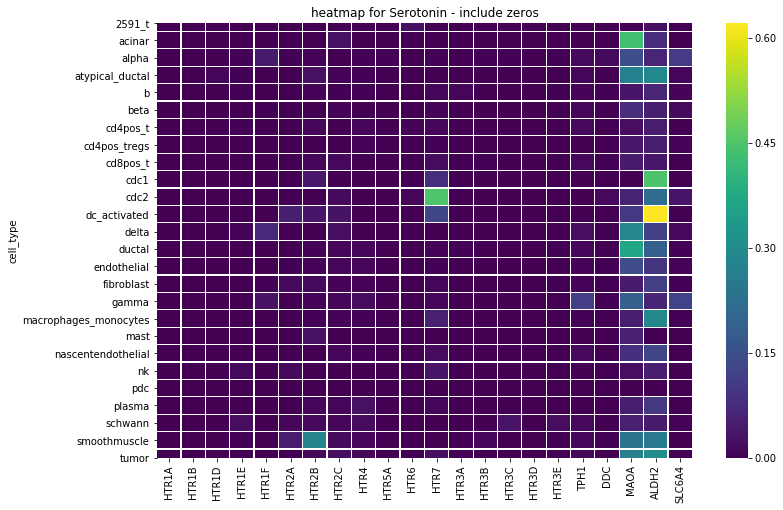

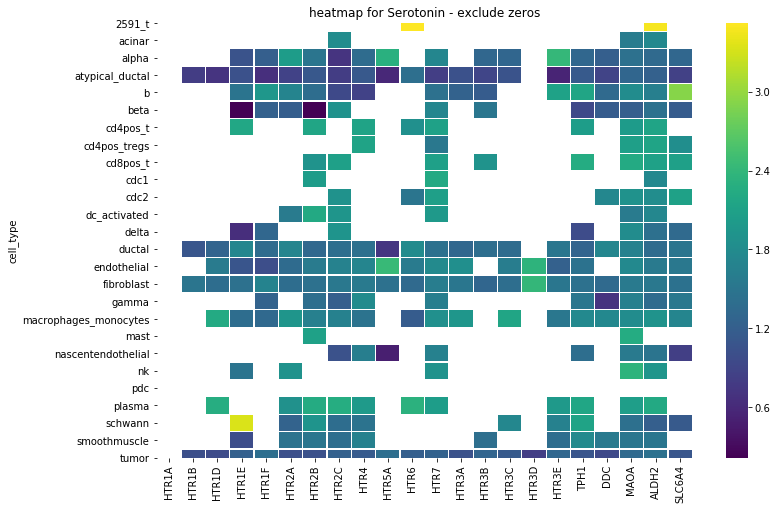

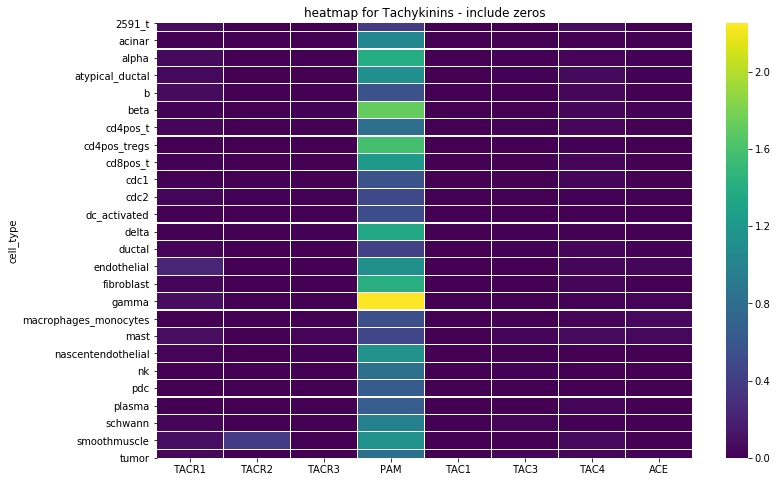

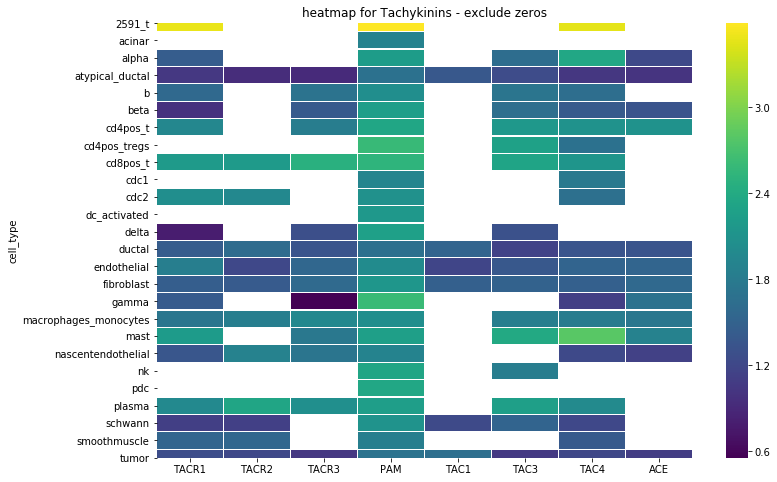

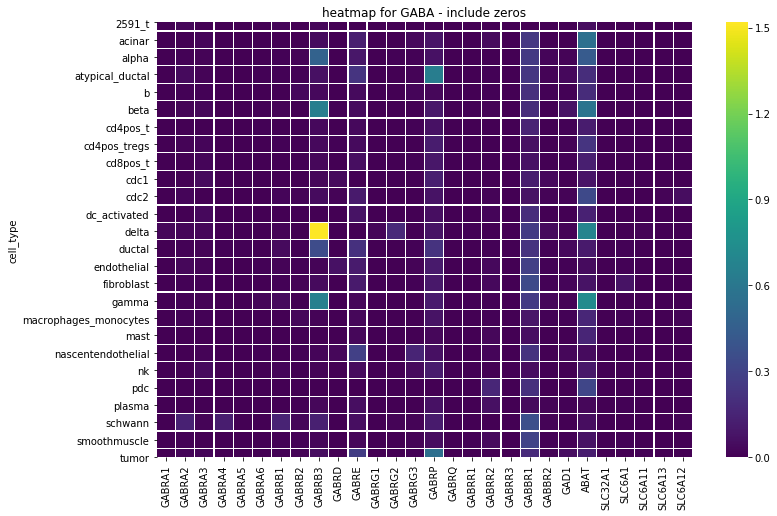

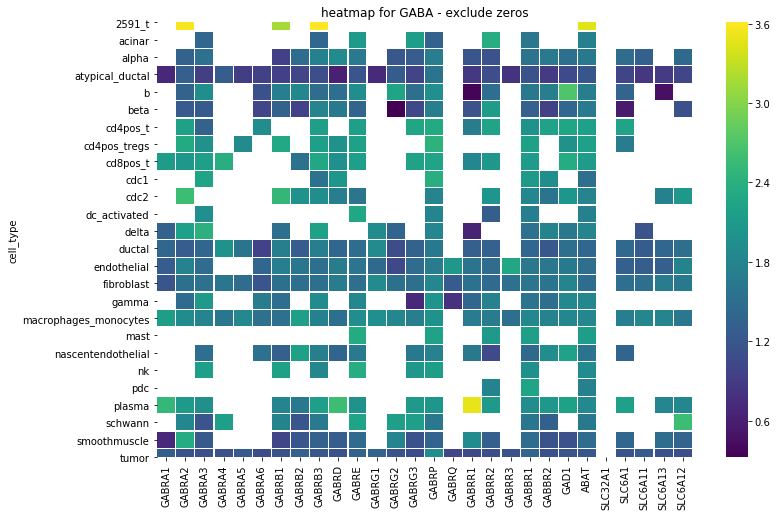

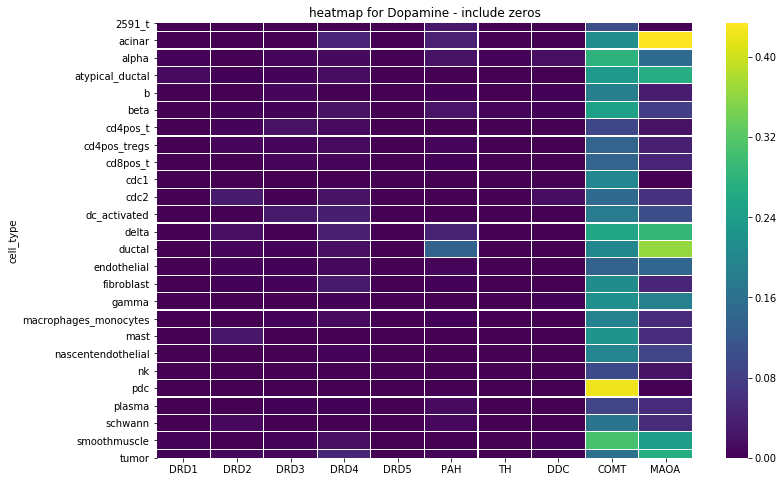

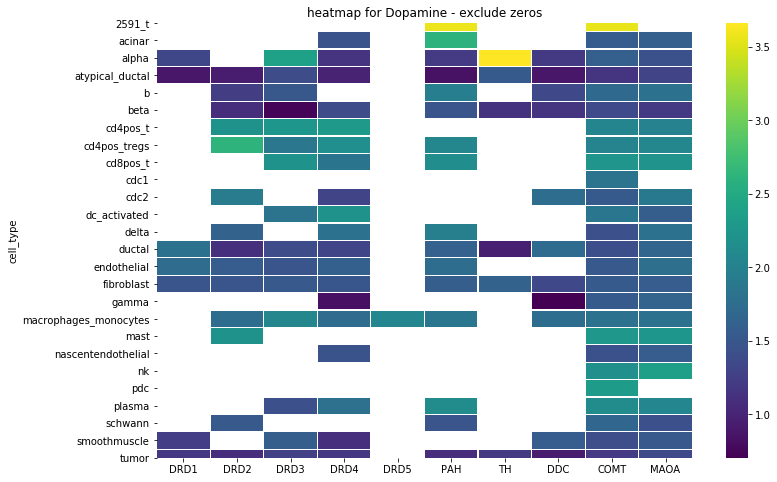

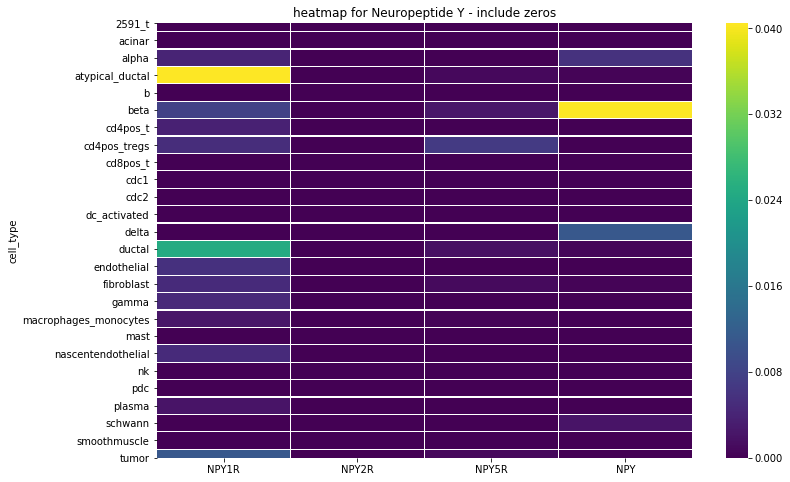

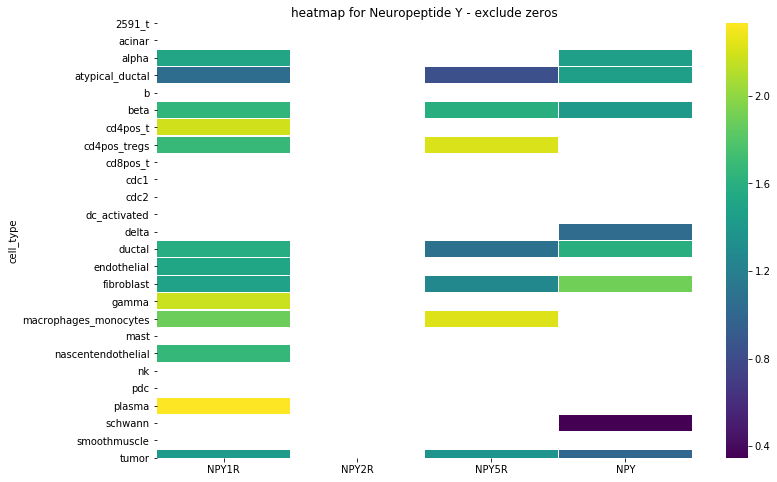

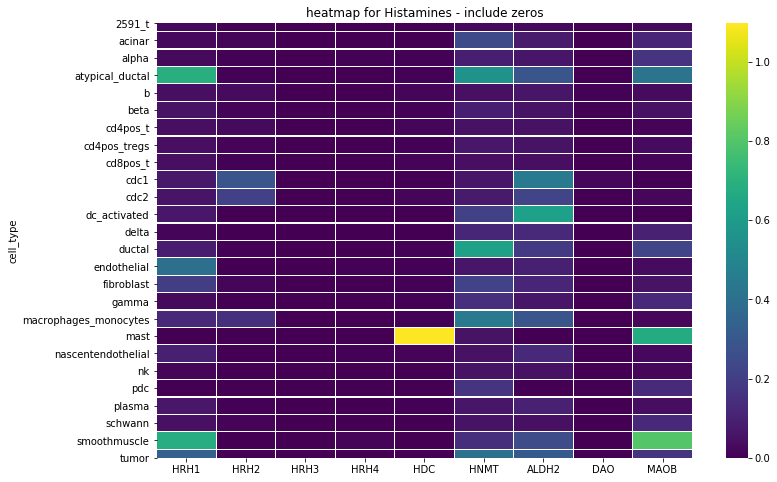

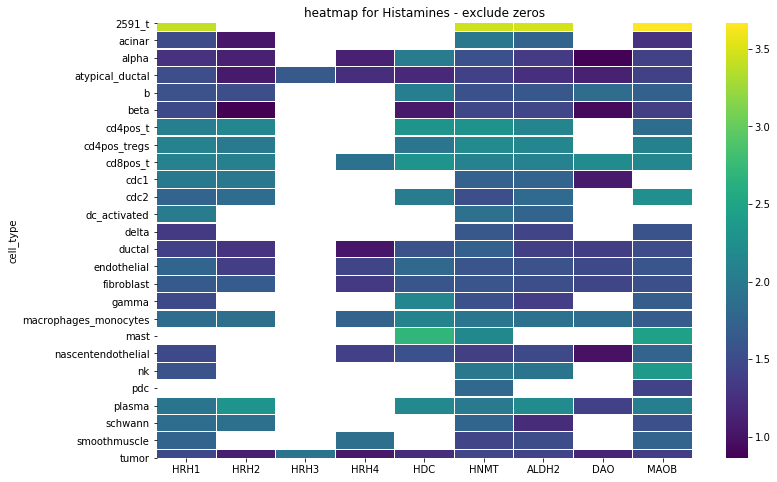

In [26]:
for group in df_neuro_groups['Neurotransmitter Ligand'].unique():
    
    genes_in_group = list(df_neuro_groups[df_neuro_groups['Neurotransmitter Ligand'] == group]['Genes'])
    genes_in_group = [val for val in genes_in_group if val not in ['PPYR1', 'HTR5BP']]
    df_group = df_hm_2[genes_in_group+['cell_type']]
    df_group_hm_mean = df_group.groupby('cell_type').mean()

    plt.figure(figsize = (12,8))
    sns.heatmap(df_group_hm_mean,linewidth = .2, cmap="viridis")
    plt.title('heatmap for {} - include zeros'.format(group))
    plt.savefig('single_cell_heatmaps/{}_heatmap_with_zeros.png'.format(group))

    df_group_nonzero = df_group.replace(0,np.nan)
    df_group_hm_mean_nonzero = df_group_nonzero.groupby('cell_type').agg(np.nanmean)

    plt.figure(figsize = (12,8))
    sns.heatmap(df_group_hm_mean_nonzero,linewidth = .2,cmap="viridis")

    plt.title('heatmap for {} - exclude zeros'.format(group))
    plt.savefig('single_cell_heatmaps/{}_heatmap_nonzeros.png'.format(group))
    

# Context and Background

**this analysis will only be done on tumor cells**

1. For each of the 22 genes on our short list, we are going to generate a list of the top 1000 other genes that covary with it the most. So for example, for GABRP, we will want to know which 1000 genes out of the entire transcriptome (so the whole matrix) have the highest correlation to it. Then I will run biological analyses on this list of 1000 genes that you give me.

2. I am going to discuss in terms of GABRP because I think it will be easier just to use a specific gene as a case example. First, we will subset only to the cells that contain >0 expression of GABRP. This will hopefully make the computational analysis more streamlined by reducing the size of the dataset to work with.

3. Then, for each two gene correlation assessment (e.g. GABRP and gene X), we will first evaluate if there are at least 100 cells in which there is non-zero expression for both GABRP and gene X. This is to isolate our analysis specifically to cells in which there are continuous values present, so that we don't have zero values tampering with our data. Do this for each combination of GABRP and every other gene remaining in the matrix - hopefully this will make the dataset smaller again.

4. Now, in our matrix, we should only have GABRP and the genes for which there are at least 100 cells containing continuous expression values. Now for each pair of GABRP and gene X, let's generate a Pearson coefficient and Spearman's coefficient (both the R/p and also the p value), only on the cells that have continuous variables.


In [6]:
column_names = pd.read_csv('data/columns for X.csv',header = None)
column_names = list(column_names[0])

rows = pd.read_csv('data/rows for X.csv',header = None)
cell_type = list(rows[0])
cell_type = [val.lower() for val in cell_type]

gene_list_22 = pd.read_csv('data/gene_list_22.csv', header = None)
gene_list_22 = list(gene_list_22[0])

In [ ]:
df_22 = pd.read_csv('data/X.csv',names = column_names, usecols = gene_list_22)
df_22 = df_22[gene_list_22]
df_22['cell_type'] = cell_type
df_22_tumor = df_22[df_22['cell_type'] == 'tumor']
df_22_tumor.shape
df_22_tumor.replace(0,np.nan, inplace = True)
df_22_tumor_dropna = df_22_tumor.dropna(how = 'all', subset = gene_list_22)
df_22_tumor_dropna.shape

In [33]:
index_dict = {}
for gene in gene_list_22:
    index_dict[gene] = list(df_22_tumor[~df_22_tumor[gene].isna()].index)

In [3]:
pickle.dump(index_dict, open("data/gene_22_index_dict.pkl", "wb"))  # save it into a file named save.p

NameError: name 'index_dict' is not defined

In [4]:
with open("data/gene_22_index_dict.pkl", "rb") as f:
    index_dict = pickle.load(f)

In [37]:

gene_col_list = []
r_pearson_list = []
r_spearman_list = []
p_pearson_list = []
p_spearman_list = []
n_rows_list = []

for col in df_g.columns:
    filename = '{}_correlation.csv'.format(gene)
    if col not in gene:
        df_subset = df_g[[gene,col]]
        df_subset_filtered = df_subset[~df_subset[col].isna()]
        r_pearson, p_pearson = pearsonr(df_subset_filtered[gene], df_subset_filtered[col])
        r_spearman, p_spearman = spearmanr(df_subset_filtered[gene], df_subset_filtered[col])
        
        n_rows = df_subset_filtered.shape[0]
        gene_col_list.append(col)
        r_pearson_list.append(r_pearson)
        p_pearson_list.append(p_pearson)
        
        r_spearman_list.append(r_spearman)
        p_spearman_list.append(p_spearman)        
        
        n_rows_list.append(n_rows)


In [39]:
df_gene_corr = pd.DataFrame({'gene':gene_col_list,
                             'r_pearson':np.round(r_pearson_list,5),
                             'p_pearson':p_pearson_list,
                             'r_spearman':np.round(r_spearman_list,5),
                             'p_spearman':p_spearman_list,
                             'n_rows_nonzero' : n_rows_list
                            })
df_gene_corr.sort_values(by= 'r_pearson', ascending = False, inplace = True)
df_gene_corr.to_csv('data/single_cell_correlation/{}'.format(filename),index = False)

In [7]:
start = time.time()

for gene in gene_list_22:
    
    print('start with {}'.format(gene))
    skiprows = [i for i in np.arange(88031) if i not in index_dict[gene]]
    df_g = pd.read_csv('data/X.csv',names = column_names, skiprows = skiprows)
    df_g.replace(0,np.nan, inplace = True)
    df_g.dropna(axis = 1, thresh = 100, inplace = True)
    
    
    print('data read - shape = {}'.format(df_g.shape))
    gene_col_list = []
    r_pearson_list = []
    r_spearman_list = []
    p_pearson_list = []
    p_spearman_list = []
    n_rows_list = []

    for col in df_g.columns:
        filename = '{}_correlation.csv'.format(gene)
        if col not in gene:
            df_subset = df_g[[gene,col]]
            df_subset_filtered = df_subset[~df_subset[col].isna()]
            r_pearson, p_pearson = pearsonr(df_subset_filtered[gene], df_subset_filtered[col])
            r_spearman, p_spearman = spearmanr(df_subset_filtered[gene], df_subset_filtered[col])

            n_rows = df_subset_filtered.shape[0]
            gene_col_list.append(col)
            r_pearson_list.append(r_pearson)
            p_pearson_list.append(p_pearson)

            r_spearman_list.append(r_spearman)
            p_spearman_list.append(p_spearman)        

            n_rows_list.append(n_rows)
            
    df_gene_corr = pd.DataFrame({'gene':gene_col_list,
                                 'r_pearson':np.round(r_pearson_list,5),
                                 'p_pearson':p_pearson_list,
                                 'r_spearman':np.round(r_spearman_list,5),
                                 'p_spearman':p_spearman_list,
                                 'n_rows_nonzero' : n_rows_list
                                })
    df_gene_corr.sort_values(by= 'r_pearson', ascending = False, inplace = True)
    df_gene_corr.to_csv('data/single_cell_correlation/{}'.format(filename),index = False)
    
    print('done with {} at {:.3f}'.format(gene, time.time()- start))

start with GABRP
data read - shape = (12570, 14081)
done with GABRP at 514.068
start with SLC6A12
data read - shape = (200, 1699)
done with SLC6A12 at 570.531
start with GAD1
data read - shape = (2106, 11146)
done with GAD1 at 715.466
start with GABRE
data read - shape = (8780, 13946)
done with GABRE at 1075.034
start with HTR2B
data read - shape = (445, 5475)
done with HTR2B at 1143.325
start with PAM
data read - shape = (21091, 15202)
done with PAM at 1900.141
start with SLC38A1
data read - shape = (18769, 15033)
done with SLC38A1 at 2586.453
start with CHRNA5
data read - shape = (1956, 11298)
done with CHRNA5 at 2717.972
start with GRIN2D
data read - shape = (6287, 13328)
done with GRIN2D at 2990.521
start with DRD4
data read - shape = (1757, 10489)
done with DRD4 at 3113.470
start with ABAT
data read - shape = (4379, 12876)
done with ABAT at 3325.112
start with GLUL
data read - shape = (11028, 14161)
done with GLUL at 3762.712
start with GLUD1
data read - shape = (12743, 14597)
don